# ImageGradients

Gradient 는 스칼라장에서 최대의 증가율을 나타내는 벡터장을 뜻한다.
이미지 좌표에서 Gradient는 밝기와 밝기의 변화하는 방향을 뜻하며,
이를 구해서 해당 픽셀이 엣지에 을마나 가까운지와 방향을 구할 수 있다

## Sobel & Scharr Filter

Gaussian smoothing 과 미분을 이용한 방식이다.
각 축으로 편미분하여 edge에 대한 선을 그려 주는 역할

`cv2.Sobel(src, ddepth, dx, dy, dst, ksize, scale, dalta, borderType)`
- src : input image
- ddepth : output image 의 depth, -1이면 입력된 이미지와 동일
- dx : x축 미분 차수
- dy : y축 미분 차수
- ksize : 커널의 사이즈

`cv2.Scharr(src, ddepth, dx, dy, dst, scale, delta, borderType)`

`cv2.Sobel()` 과 동일하나, ksize가 조금 더 정확하게 적용 됨

## Laplacian 함수
이미지의 가로 세로에 대한 gradient 를 2차 미분한 값.
blob(주위 픽셀과 확연한 차이를 보이는 덩어리) 검출에 많이 사용됨

`cv2.Laplacian(src, ddepth, dst, ksize, scale, delta, borderType)`

## Canny Edge Detection

가장 유명한 Edge Detection방법
1. Noise Reduction
    이미지의 노이즈 제거, (5,5) 가우시안 필터를 이용
2. Edge Gradient Detection
    이미지에서 Gradient의 방향 강도 파악.
    (미분값이 급격하게 변하는 부분이 경계)
3. Non-Maximum Suppression
    Edge가 아닌 픽셀은 제거함
4. Hysteresis Thresholding
    진짜 Edge인지 확인
    maxVal, minVal을 설정하여 maxVal 이상은 강한 edge, 사이는 약한 edge.
    약한edge가 강한edge와 연결되어 있으면 edge로 판단하고, 그렇지 않으면 제거한다.
    
`cv2.Canny(image, threshold1, threshold2, edges, apertureSize, L2gradients)`
- image
- threshold1 : min
- threshold2 : max

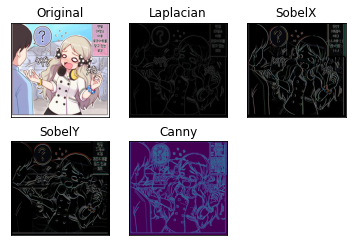

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Images/Sample_mili4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

canny = cv2.Canny(img, 30, 70)

laplacian = cv2.Laplacian(img, cv2.CV_8U)
sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=3)

images = [img, laplacian, sobelx, sobely, canny]
titles = ["Original", "Laplacian", "SobelX", "SobelY", "Canny"]

for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

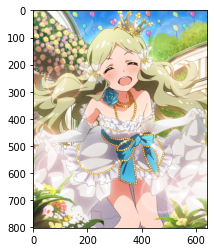

In [21]:
plt.imshow(img)